In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('nasdq100.csv',sep='\t', names=['日期','收盘','开盘','高','低','交易量','变动百分比'])

In [12]:
df['收盘'] = df['收盘'].map(lambda x: float(x.replace(',', '')))

如果按照等额定投，计算到目前为止的持有成本

In [13]:
df['收盘'].count()/np.sum(1.0 / df['收盘'])

2093.7878037897926

如果按照如下规则定投
1. 如果比上周跌2%以上，金额乘以1.2
2. 如果比上周跌5%以上，金额乘以1.5

In [14]:
df['收盘2'] = df['收盘'].shift(-1)

In [19]:
def value(x):
    if x>0.05:
        return 1.5
    if x>0.02:
        return 1.2
    return 1.0
money = (1-df['收盘']/df['收盘2']).map(lambda x: value(x))

In [20]:
money.sum()/np.sum(money/df['收盘'])

2072.1422439127073

如果按照如下规则定投
1. 如果比历史最高点跌10%以上，金额乘以1.2
2. 如果比历史最高点跌20%以上，金额乘以1.5
3. 如果比历史最高点跌30%以上，金额乘以1.8
4. 如果比历史最高点跌40%以上，金额乘以2
5. 如果比历史最高点跌50%以上，金额乘以3

In [32]:
calc_max = []
max_v = 0
for x in df.sort_values('日期')['收盘']:
    if x > max_v:
        max_v = x
    calc_max.append(max_v)
calc_max.reverse()
df['hist_max'] = calc_max

In [33]:
def value(x):
    if x>0.50:
        return 3
    if x>0.40:
        return 2
    if x>0.30:
        return 1.8
    if x>0.20:
        return 1.5
    if x>0.10:
        return 1.2
    return 1.0
money = (1-df['收盘']/df['hist_max']).map(lambda x: value(x))

In [39]:
money.sum()/np.sum(money/df['收盘'])

1828.371519341476

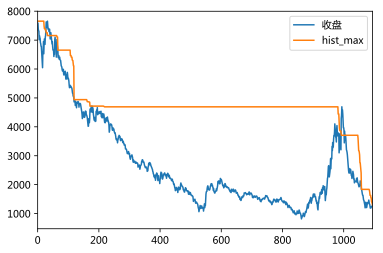

In [38]:
df[['收盘','hist_max']].plot()

如果不用历史最高点，而用近一年的最高点来执行

In [48]:
df['last_year_max'] = df.sort_values('日期').rolling(100).max()['收盘']

In [49]:
def value(x):
    if x>0.50:
        return 3
    if x>0.40:
        return 2
    if x>0.30:
        return 1.8
    if x>0.20:
        return 1.5
    if x>0.10:
        return 1.2
    return 1.0
money = (1-df['收盘']/df['last_year_max']).map(lambda x: value(x))

In [51]:
money.sum()/np.sum(money/df['收盘'])

1875.8227089263316